#  <font color='green'>Aluna: Ludmila Müller</font> - ludmilamuller7@gmail.com

# <font color='green'>INDICE</font>

* [1 Informações gerais](#1-Informações-gerais)
* [2 Rede Neural - rnn lstm](#2-Rede-neural---rnn-lstm)
* [3 Twitter - análise de sentimento](#3-Twitter---análise-de-sentimento)

# <font color='blue'>1 Informações gerais</font>

### 1.1 descrição do problema

* Treinar uma rede neural sobre previsão de série temporal, pegando como exemplo uma série histórica da Apple na bolsa americana. 
* Após isso, verificar se há relação entre o preço da ação e publicações no Twitter (#appl), por análise se sentimentos.

### 1.2 descrição da solução

* A solução será por python, utilizando bibliotecas como numpy, pandas, matplotlib.pyplot, keras, tweepy e textblob.

* Tentei utilizar GetOldTweets3 para extrai tweets postados com mais de 9 dias, mas não funcionou.

### 1.3 descrição dos resultados

* O treinamento apresentado pela rede neural foi bem sucedido. Os indicadores MSE, RMSE e MAPE apresentaram valores baixos. O gráfico comparativo com as séries de previsão e resultado indicam baixo erro também.
* A análise de sentimentos indicou que, apesar dos tweets terem sido classificados majoritariamente como neutros e positivos, possuem baixa objetividade/ finalidade.


### 1.4 conclusões e trabalhos futuros

* Considerando a baixa objetividade nos tweets encontrados pela "#aapl" e a comparação da oscilação do preço da ação no período de teste com a baixa taxa de classificação de tweets como 'negativos', conclui-se que o Twitter não é uma boa fonte realizar análise de sentimentos e relacioná-la com os preços acionários da Apple.
* Sugere-se utilizar outra rede social para buscar algum resultado expressivo na análise de sentimentos. Um motivo seria o perídodo de extração pequeno disponibilizado pelo Twitter, ao utilizar sua API, e o outro seria o próprio uso da rede social, limitado a 140 caracteres, sendo que muitas pessoas "gastam" o espaço para marmcar mais hashtags e outros usuários, evitando publicações com conteúdos relevantes.

# <font color='blue'>2 Rede neural - rnn lstm</font>

#### 2.1 - Preprocessamento de Dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = [16, 8]

In [3]:
df = pd.read_csv('AAPL_JAN_2021.csv') # fonte https://finance.yahoo.com/quote/AAPL/history?p=AAPL
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-30,0.378214,0.383929,0.377679,0.380000,0.327807,204853600
1,2003-12-31,0.381250,0.384464,0.378214,0.381607,0.329194,174451200
2,2004-01-02,0.384821,0.388393,0.378214,0.380000,0.327807,144642400
3,2004-01-05,0.382500,0.399821,0.382500,0.395893,0.341517,395018400
4,2004-01-06,0.397321,0.400357,0.387679,0.394464,0.340285,509348000


In [4]:
print(f'O período do dataframe começa em {df.Date.min()} e termina em {df.Date.max()}.')

O período do dataframe começa em 2003-12-30 e termina em 2021-01-15.


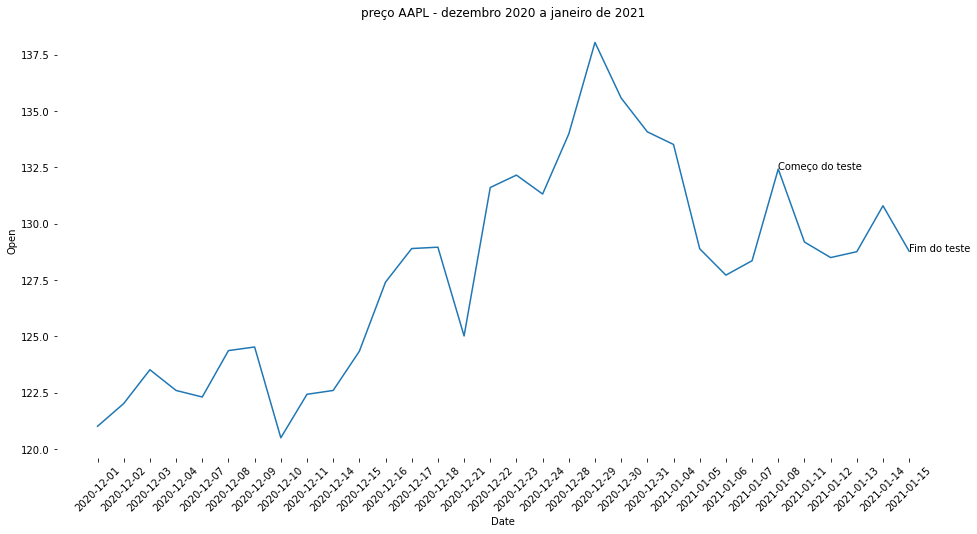

In [5]:
#verificar preços da ação em janeiro 
#obs: api do twitter, versao gratuita, permitiu extração dos twitters entre 09/01/21 e 17/01/21
#para periodos maiores de extraçao de tweets deve-se considerar o uso da 'api premium'

dezembro_janeiro = df.query("Date >= '2020-12-01'")
sns.lineplot(data=dezembro_janeiro, x="Date", y="Open")
plt.title('preço AAPL - dezembro 2020 a janeiro de 2021')
plt.annotate(text='Começo do teste', xy=('2021-01-08', 132.429993))
plt.annotate(text='Fim do teste', xy=('2021-01-15', 128.779999))
plt.xticks(rotation=45)
plt.box(False)

In [6]:
print(len(df[df.Date < '2021-01-09'])) # devido ao corte de data permitodo pela API do twitter (9 dias - 09/01/21 a 17/01/21)
print('\n')
print(df.Date.iloc[4286])
print(df.Date.iloc[4287])

4287


2021-01-08
2021-01-11


In [7]:
# SEGREGAR BASE - TREINO E TESTE

df_treino = df[['Open']][:4286].copy()
df_teste = df[['Open']][4286:].copy()
print(len(df_treino) + len(df_teste) == len(df))

True


In [8]:
training_set = df_treino.values 

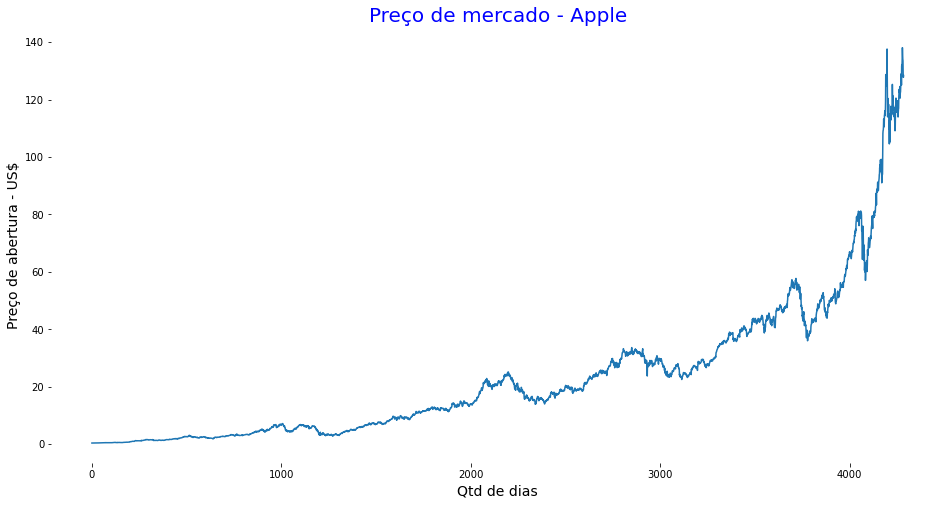

In [9]:
# GRÁFICO DA SÉRIE TEMPORAL


plt.plot(training_set)
plt.xlabel("Qtd de dias", fontsize = 14)
plt.ylabel("Preço de abertura - US$", fontsize = 14)
plt.title("Preço de mercado - Apple", fontsize = 20, color = 'blue')
plt.box(False)

In [10]:
# NORMALIZAÇÃO 

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
# ESTRUTURA DE DADOS - JANELA E SAÍDA/OUTPUT

window = 10
trainSize = len(training_set_scaled)
X_train = []
y_train = []

for i in range(window, trainSize):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train #check

array([[0.00000000e+00, 2.20524482e-05, 4.79909504e-05, ...,
        2.65900518e-04, 2.68500905e-04, 4.56571390e-04],
       [2.20524482e-05, 4.79909504e-05, 3.11320135e-05, ...,
        2.68500905e-04, 4.56571390e-04, 4.17660004e-04],
       [4.79909504e-05, 3.11320135e-05, 1.38786604e-04, ...,
        4.56571390e-04, 4.17660004e-04, 2.24396009e-04],
       ...,
       [9.33973430e-01, 9.05354568e-01, 9.53222065e-01, ...,
        9.82058772e-01, 9.71163293e-01, 9.67095663e-01],
       [9.05354568e-01, 9.53222065e-01, 9.57217096e-01, ...,
        9.71163293e-01, 9.67095663e-01, 9.33464916e-01],
       [9.53222065e-01, 9.57217096e-01, 9.51115649e-01, ...,
        9.67095663e-01, 9.33464916e-01, 9.24966458e-01]])

#### Reshaping

In [13]:
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('')
print(X_train.shape) #check

(4276, 10)

(4276, 10, 1)


#### 2.2 - Construção da RNN

In [14]:
## IMPORTAR BIBLIOTECAS

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
## MONTAR REDE - CAMADAS, DROPOUT, COMPILAÇÃO E VISUALIZAÇÃO


regressor = Sequential() # Initicializar a RNN

regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1))) # add a 1ª camada LSTM e Dropout 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, return_sequences = True)) # add a 2ª camada LSTM e Dropout
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50)) # add a 3ª camada LSTM e Dropout
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1)) # Camada de saída

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compilar a rede 

regressor.summary() # Visualizar a rede

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 10, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 80)            57920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [16]:
## TREINAMENTO DA REDE

regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)

Epoch 1/250
134/134 [==============================] - 8s 12ms/step - loss: 0.0092
Epoch 2/250
134/134 [==============================] - 2s 12ms/step - loss: 6.6958e-04
Epoch 3/250
134/134 [==============================] - 2s 12ms/step - loss: 6.2053e-04
Epoch 4/250
134/134 [==============================] - 2s 13ms/step - loss: 6.0153e-04
Epoch 5/250
134/134 [==============================] - 2s 12ms/step - loss: 7.7646e-04
Epoch 6/250
134/134 [==============================] - 2s 12ms/step - loss: 5.2794e-04
Epoch 7/250
134/134 [==============================] - 1s 11ms/step - loss: 8.9904e-04
Epoch 8/250
134/134 [==============================] - 1s 11ms/step - loss: 6.1517e-04
Epoch 9/250
134/134 [==============================] - 1s 11ms/step - loss: 5.9317e-04
Epoch 10/250
134/134 [==============================] - 2s 11ms/step - loss: 3.4800e-04
Epoch 11/250
134/134 [==============================] - 2s 13ms/step - loss: 5.6048e-04
Epoch 12/250
134/134 [=======================

134/134 [==============================] - 3s 22ms/step - loss: 3.5772e-04
Epoch 94/250
134/134 [==============================] - 2s 18ms/step - loss: 3.5246e-04
Epoch 95/250
134/134 [==============================] - 2s 14ms/step - loss: 3.8834e-04
Epoch 96/250
134/134 [==============================] - 2s 15ms/step - loss: 3.2044e-04
Epoch 97/250
134/134 [==============================] - 2s 17ms/step - loss: 2.9176e-04
Epoch 98/250
134/134 [==============================] - 3s 20ms/step - loss: 4.6748e-04
Epoch 99/250
134/134 [==============================] - 3s 21ms/step - loss: 2.8087e-04
Epoch 100/250
134/134 [==============================] - 3s 20ms/step - loss: 3.3921e-04
Epoch 101/250
134/134 [==============================] - 3s 20ms/step - loss: 3.3588e-04: 
Epoch 102/250
134/134 [==============================] - 5s 35ms/step - loss: 3.3132e-04: 0s - loss: 3.3368
Epoch 103/250
134/134 [==============================] - 5s 37ms/step - loss: 2.8964e-04
Epoch 104/250
134/13

134/134 [==============================] - 2s 15ms/step - loss: 2.8237e-04: 1
Epoch 185/250
134/134 [==============================] - 2s 14ms/step - loss: 2.9969e-04
Epoch 186/250
134/134 [==============================] - 2s 14ms/step - loss: 3.0641e-04
Epoch 187/250
134/134 [==============================] - 2s 15ms/step - loss: 3.1137e-04
Epoch 188/250
134/134 [==============================] - 2s 15ms/step - loss: 2.6962e-04
Epoch 189/250
134/134 [==============================] - 2s 15ms/step - loss: 2.9123e-04
Epoch 190/250
134/134 [==============================] - 2s 14ms/step - loss: 3.4137e-04
Epoch 191/250
134/134 [==============================] - 2s 16ms/step - loss: 2.8835e-04
Epoch 192/250
134/134 [==============================] - 2s 16ms/step - loss: 2.5319e-04
Epoch 193/250
134/134 [==============================] - 2s 14ms/step - loss: 3.0234e-04
Epoch 194/250
134/134 [==============================] - 2s 14ms/step - loss: 3.2623e-04
Epoch 195/250
134/134 [=========

#### 2.3 - Fazer as previsões e analisar os resultados

In [17]:
# BASE DE TESTE

real_stock_price = df_teste.values

In [18]:
# MONTAR ESTRUTURA PARA TESTE

dataset_total = pd.concat((df_treino.iloc[:,0], df_teste.iloc[:,0]), axis = 0)

testLength = len(df_teste)

inputs = dataset_total[len(dataset_total) - testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(window, testLength + window): 
    X_test.append(inputs[i-window:i, 0])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
# REALIZAR AS PREVISOES

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

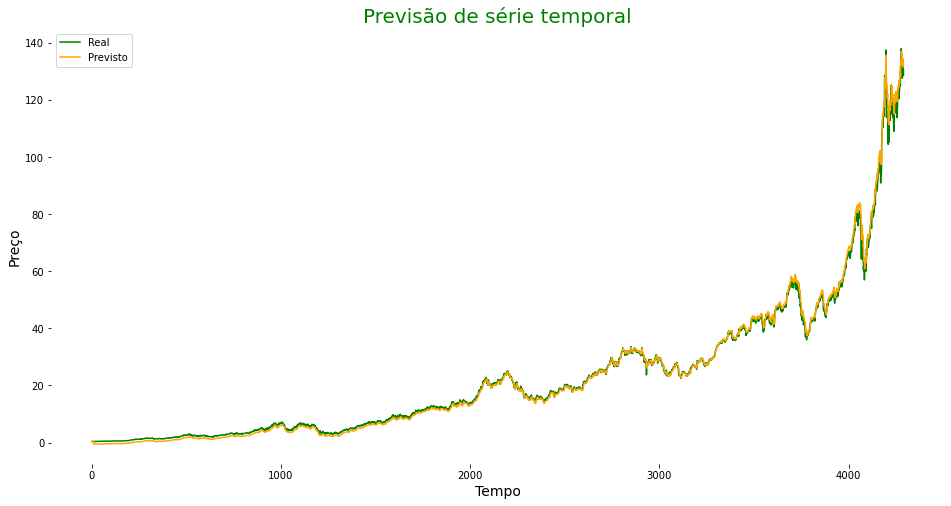

In [20]:
# RESULTADOS TREINO X TESTE - VISUALIZAR

allTargetData = np.vstack((training_set, real_stock_price))

training_predicted_stock_price = regressor.predict(X_train)
training_predicted_stock_price = sc.inverse_transform(training_predicted_stock_price)

allForecastedData = np.vstack((training_set[0:window], training_predicted_stock_price, predicted_stock_price))

plt.plot(allTargetData, color = 'green', label = 'Real')
plt.plot(allForecastedData, color = 'orange', label = 'Previsto')

plt.title('Previsão de série temporal', fontsize = 20, color = 'g')
plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Preço',fontsize = 14)
plt.legend()
plt.box(False)#plt.savefig('predictions_training_test.svg')

In [21]:
# CHECK - P1

print(len(pd.DataFrame(data = allForecastedData)))
print(len(pd.DataFrame(data = allTargetData)))

# CHECK - P2

target = pd.DataFrame(data = allTargetData)
forecast = pd.DataFrame(data = allForecastedData)

target.rename({0:'target'}, axis = 1, inplace = True)
forecast.rename({0:'forecast'}, axis = 1, inplace = True)

df = target.copy()
df['forecast'] = forecast.copy()
df['dif'] = df.forecast - df.target
df.tail()
#df.to_excel('verificar_forecast_target_diff.xlsx')

4292
4292


,target,forecast,dif
4287,129.190002,134.587006,5.397004
4288,128.500000,131.710419,3.210419
4289,128.759995,132.162079,3.402084
4290,130.800003,131.990082,1.190079
4291,128.779999,133.014603,4.234604


#### 2.4 - Métricas de avaliação

In [22]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

mse = mean_squared_error(real_stock_price, predicted_stock_price)

mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100

print('RMSE: ', rmse)
print('MSE: ',mse)
print('MAPE: ',mape)

RMSE:  3.4258211023159064
MSE:  11.736250225072974
MAPE:  2.2837212823252138


# <font color='blue'>3 Twitter - análise de sentimento</font>

In [23]:
# importar bibliotecas
import tweepy # Tweepy - Python library for accessing the Twitter API.
from textblob import TextBlob # TextBlob - Python library for processing textual data
from wordcloud import WordCloud
import re

In [24]:
# twitter api

twitterApiKey = 'McZQC8ZsMuQDoTcjbuc2CZE5y'
twitterApiSecret = 'JbQtNHzu46OSIVUXZMNoshsRVCMkStmixCyi4lhFSmCLjvZTYG'
twitterApiAccessToken = '1185564033614790657-u7UbsVJuUMdgUSRy5BgGnaKZTcBEHZ'
twitterApiAccessTokenSecret = 'DYipens9cbOiyyf6ob5MHuXPHfGb04pVTdpocTyJmbxPp'

# autenticar
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [25]:
#procura - termos e datas
#script rodado em 17/01/21 pegou intervalo de tweets a partir de 09/01/21 

search_words = "#AAPL"
date_since = "2021-01-01" # ñ importa
#date_until = "2021-01-17" #ñ tem utilidade
qtd_tweets=10000


#coleta de tweets
tweets = tweepy.Cursor(twetterApi.search,
                    q=search_words,
                    lang="en",
                    since=date_since,
                    #until=date_until, 
                    #result_type="recent"
                      ).items(qtd_tweets) 

tweets_list = [[tweet.text, tweet.created_at, tweet.id_str, tweet.user.screen_name, tweet.coordinates, 
                tweet.place, tweet.retweet_count, tweet.favorite_count, tweet.lang, tweet.source, 
                tweet.in_reply_to_status_id_str, tweet.in_reply_to_user_id_str, tweet.is_quote_status] for tweet in tweets]

tweets_df = pd.DataFrame(tweets_list,columns=['Tweet Text', 'Tweet Datetime', 'Tweet Id', 
                                              'Twitter @ Name', 'Tweet Coordinates', 'Place Info', 
                                              'Retweets', 'Favorites', 'Language', 'Source', 'Replied Tweet Id', 
                                              'Replied Tweet User Id Str', 'Quote Status Bool'])

tweets_df.head() #tweets_df.to_excel('verificartweets.xlsx')

,Tweet Text,Tweet Datetime,Tweet Id,Twitter @ Name,Tweet Coordinates,Place Info,Retweets,Favorites,Language,Source,Replied Tweet Id,Replied Tweet User Id Str,Quote Status Bool
0,2/Black Scholes model #Python code for #AAPL s...,2021-01-17 16:01:25,1350835626212515844,startupmonit0r,None,None,0,1,en,Twitter for Android,1350835598534336512,879595381180575744,False
1,#EURCAD 275 PIPS Profit🔥✅⭐️\n\nFor Free signal...,2021-01-17 15:38:51,1350829947263324160,fxqueen77528A,None,None,0,0,en,MagicPot,None,None,False
2,Apple zone out - #AAPL chart https://t.co/9Wea...,2021-01-17 14:51:28,1350818025197326340,mcleodesc,None,None,0,0,en,TradingView,None,None,False
3,#EURCAD 275 PIPS Profit🔥✅⭐️\n\nFor Free signal...,2021-01-17 14:39:16,1350814951426940931,Fxqueen42000A,None,None,0,0,en,MagicPot,None,None,False
4,Income Lab Ideas: 'Cautiously Optimistic' Head...,2021-01-17 12:38:03,1350784446555848708,designyourinves,None,None,0,0,en,dlvr.it,None,None,False


In [26]:
print(tweets_df['Tweet Datetime'].min())
print(tweets_df['Tweet Datetime'].max())

2021-01-09 20:52:21
2021-01-17 16:01:25


In [27]:
# limpar tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

tweets_df['Tweet Text'] = tweets_df['Tweet Text'].apply(cleanUpTweet)

In [28]:
# polaridade e subjetividade

def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

tweets_df['Subjectivity'] = tweets_df['Tweet Text'].apply(getTextSubjectivity)
tweets_df['Polarity'] = tweets_df['Tweet Text'].apply(getTextPolarity)
tweets_df.head()

,Tweet Text,Tweet Datetime,Tweet Id,Twitter @ Name,Tweet Coordinates,Place Info,Retweets,Favorites,Language,Source,Replied Tweet Id,Replied Tweet User Id Str,Quote Status Bool,Subjectivity,Polarity
0,2/Black Scholes model Python code for AAPL sto...,2021-01-17 16:01:25,1350835626212515844,startupmonit0r,None,None,0,1,en,Twitter for Android,1350835598534336512,879595381180575744,False,0.0,0.0
1,EURCAD 275 PIPS Profit🔥✅⭐️\n\nFor Free signals...,2021-01-17 15:38:51,1350829947263324160,fxqueen77528A,None,None,0,0,en,MagicPot,None,None,False,0.8,0.4
2,Apple zone out - AAPL chart,2021-01-17 14:51:28,1350818025197326340,mcleodesc,None,None,0,0,en,TradingView,None,None,False,0.0,0.0
3,EURCAD 275 PIPS Profit🔥✅⭐️\n\nFor Free signals...,2021-01-17 14:39:16,1350814951426940931,Fxqueen42000A,None,None,0,0,en,MagicPot,None,None,False,0.8,0.4
4,Income Lab Ideas: 'Cautiously Optimistic' Head...,2021-01-17 12:38:03,1350784446555848708,designyourinves,None,None,0,0,en,dlvr.it,None,None,False,0.0,0.0


In [29]:
tweets_df = tweets_df.drop(tweets_df[tweets_df['Tweet Text'] == ''].index)
tweets_df.head()

,Tweet Text,Tweet Datetime,Tweet Id,Twitter @ Name,Tweet Coordinates,Place Info,Retweets,Favorites,Language,Source,Replied Tweet Id,Replied Tweet User Id Str,Quote Status Bool,Subjectivity,Polarity
0,2/Black Scholes model Python code for AAPL sto...,2021-01-17 16:01:25,1350835626212515844,startupmonit0r,None,None,0,1,en,Twitter for Android,1350835598534336512,879595381180575744,False,0.0,0.0
1,EURCAD 275 PIPS Profit🔥✅⭐️\n\nFor Free signals...,2021-01-17 15:38:51,1350829947263324160,fxqueen77528A,None,None,0,0,en,MagicPot,None,None,False,0.8,0.4
2,Apple zone out - AAPL chart,2021-01-17 14:51:28,1350818025197326340,mcleodesc,None,None,0,0,en,TradingView,None,None,False,0.0,0.0
3,EURCAD 275 PIPS Profit🔥✅⭐️\n\nFor Free signals...,2021-01-17 14:39:16,1350814951426940931,Fxqueen42000A,None,None,0,0,en,MagicPot,None,None,False,0.8,0.4
4,Income Lab Ideas: 'Cautiously Optimistic' Head...,2021-01-17 12:38:03,1350784446555848708,designyourinves,None,None,0,0,en,dlvr.it,None,None,False,0.0,0.0


In [30]:
# classificar tweets - neutros, positivos e negativos
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"
    
tweets_df['Score'] = tweets_df['Polarity'].apply(getTextAnalysis)
tweets_df.head()

,Tweet Text,Tweet Datetime,Tweet Id,Twitter @ Name,Tweet Coordinates,Place Info,Retweets,Favorites,Language,Source,Replied Tweet Id,Replied Tweet User Id Str,Quote Status Bool,Subjectivity,Polarity,Score
0,2/Black Scholes model Python code for AAPL sto...,2021-01-17 16:01:25,1350835626212515844,startupmonit0r,None,None,0,1,en,Twitter for Android,1350835598534336512,879595381180575744,False,0.0,0.0,Neutral
1,EURCAD 275 PIPS Profit🔥✅⭐️\n\nFor Free signals...,2021-01-17 15:38:51,1350829947263324160,fxqueen77528A,None,None,0,0,en,MagicPot,None,None,False,0.8,0.4,Positive
2,Apple zone out - AAPL chart,2021-01-17 14:51:28,1350818025197326340,mcleodesc,None,None,0,0,en,TradingView,None,None,False,0.0,0.0,Neutral
3,EURCAD 275 PIPS Profit🔥✅⭐️\n\nFor Free signals...,2021-01-17 14:39:16,1350814951426940931,Fxqueen42000A,None,None,0,0,en,MagicPot,None,None,False,0.8,0.4,Positive
4,Income Lab Ideas: 'Cautiously Optimistic' Head...,2021-01-17 12:38:03,1350784446555848708,designyourinves,None,None,0,0,en,dlvr.it,None,None,False,0.0,0.0,Neutral


In [31]:
# percentuais - neutros, positivos e negativos - dos tweets

positive = tweets_df[tweets_df['Score'] == 'Positive']
neutral = tweets_df[tweets_df['Score'] == 'Neutral']
neg = tweets_df[tweets_df['Score'] == 'Negative']

print(str(positive.shape[0]/(tweets_df.shape[0])*100) + " % of positive tweets")
print(str(neutral.shape[0]/(tweets_df.shape[0])*100) + " % of neutral tweets")
print(str(neg.shape[0]/(tweets_df.shape[0])*100) + " % of negative tweets")

40.11741682974559 % of positive tweets
51.07632093933464 % of neutral tweets
8.806262230919765 % of negative tweets


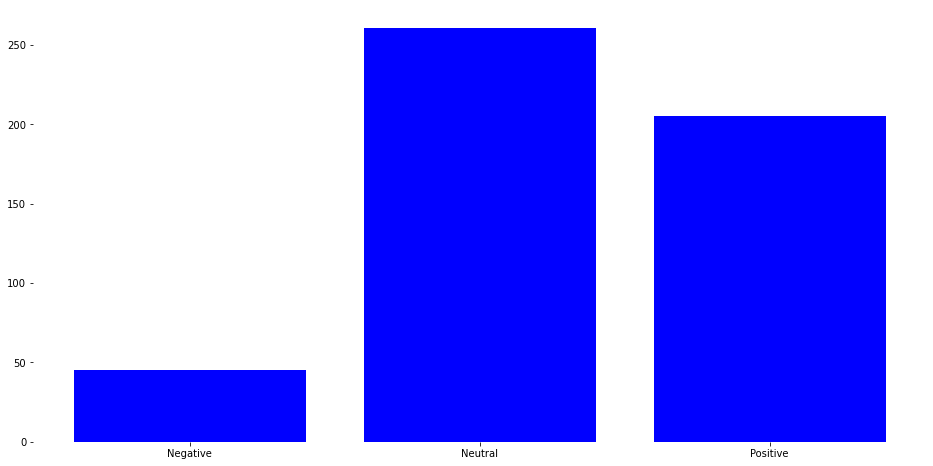

In [32]:
# percentuais - neutros, positivos e negativos - dos tweets GRAFICO BARRAS 
labels = tweets_df.groupby('Score').count().index.values
values = tweets_df.groupby('Score').size().values

plt.bar(labels, values, color = 'blue')
plt.box(False)

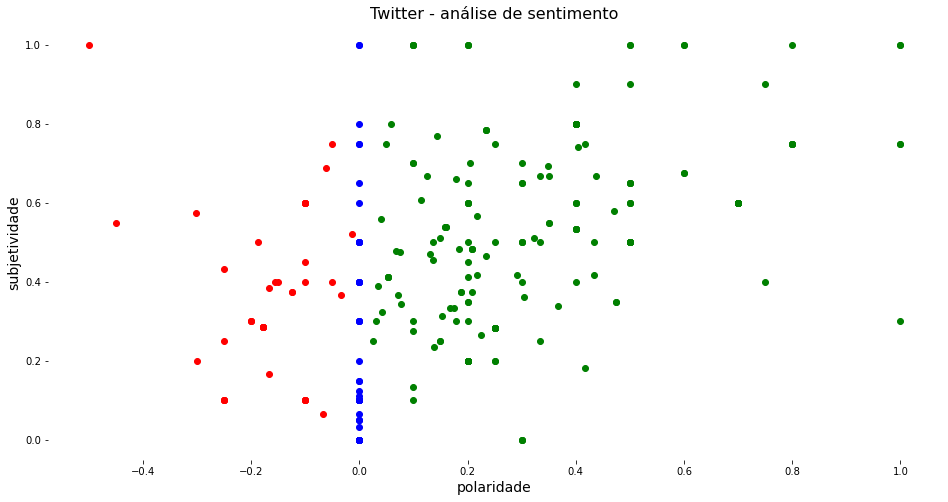

In [33]:
# percentuais - neutros, positivos e negativos - dos tweets GRAFICO DISPERSÃO 

for index, row in tweets_df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter - análise de sentimento', fontsize = 16)
plt.xlabel('polaridade', fontsize = 14)
plt.ylabel('subjetividade', fontsize = 14)
# add legend
plt.box(False)

In [34]:
objective = tweets_df[tweets_df['Subjectivity'] == 0]
print(str(objective.shape[0]/(tweets_df.shape[0])*100) + " % de tweets com finalidade")

43.6399217221135 % de tweets com finalidade


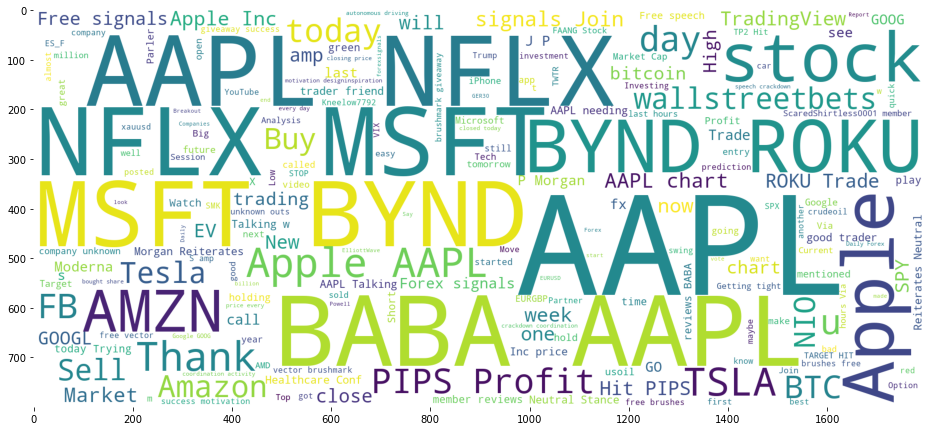

In [35]:
# wordcloud

words = ' '.join([tweet for tweet in tweets_df['Tweet Text']])
wordCloud = WordCloud(width=1800, height=800, background_color = 'white').generate(words)

plt.imshow(wordCloud)
plt.box(False)
plt.show()